# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [16]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = ["#FF8853", "#FFE174", "#007597", "#C1C36D", "#00A697", "#BC97E0", "#ffc0bf"] #[ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [3]:
def show_values_on_bars(axs, size=14):
    def _show_on_single_plot(ax, size=size):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = max(p.get_y() + p.get_height() - 0.15, 0.1)
            value = '{:.2f}'.format(p.get_height())
            # print(_y, p.get_facecolor())
            blue_col = p.get_facecolor()[2]
            green_col = p.get_facecolor()[1]
#             if(p.get_height()<0.2):
#                 continue
            if(green_col>0.5):# or green_col<0.4):
                ax.text(_x, _y, value, ha="center", size=size) 
            else:
                ax.text(_x, _y, value, ha="center", size=size, color="white")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Result Data

In [4]:
df_results_Encoders = pd.read_excel("Results/FewShotLearningTraitClassification_Encoder.xlsx")
df_results_SetFit = pd.read_excel("Results/FewShotLearningTraitClassification_SetFit.xlsx")

## Group Results

In [5]:
df_results_full = pd.concat([df_results_Encoders, df_results_SetFit])

In [6]:
df_results_full

,Dataset,Trait,Sample Size,Accuracy,Precision,Recall,F1-Score,Model
0,POWO,Growth Form,32,0,0,0,0.277440,DistilBERT
1,POWO,Growth Form,128,0,0,0,0.277440,DistilBERT
2,POWO,Growth Form,512,0,0,0,0.796845,DistilBERT
3,WIKI,Growth Form,32,0,0,0,0.228762,DistilBERT
4,WIKI,Growth Form,128,0,0,0,0.230679,DistilBERT
5,WIKI,Growth Form,512,0,0,0,0.838805,DistilBERT
0,POWO,Growth Form,32,0,0,0,0.306703,SetFit
1,POWO,Growth Form,128,0,0,0,0.794675,SetFit
2,POWO,Growth Form,512,0,0,0,0.835472,SetFit
3,WIKI,Growth Form,32,0,0,0,0.519236,SetFit


In [7]:
df_results_full.to_excel("Results/FewShotLearning_Full_Results.xlsx", index = False)

In [8]:
df_results_max = pd.read_excel("Results/CategoricalTraitClassification_Encoder_Results_Growth_Form.xlsx")

In [9]:
df_results_max

,Dataset,Trait,Sample Size,Accuracy,Precision,Recall,F1-Score,Model
0,POWO,Growth Form,3750,0.9224,0.861821,0.859426,0.860619,DistilBERT
1,WIKI,Growth Form,3750,0.9136,0.902922,0.899314,0.900939,DistilBERT


# Model Comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_89700\3658844088.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=14)
C:\Users\Admin\AppData\Local\Temp\ipykernel_89700\3658844088.py:19: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 600)


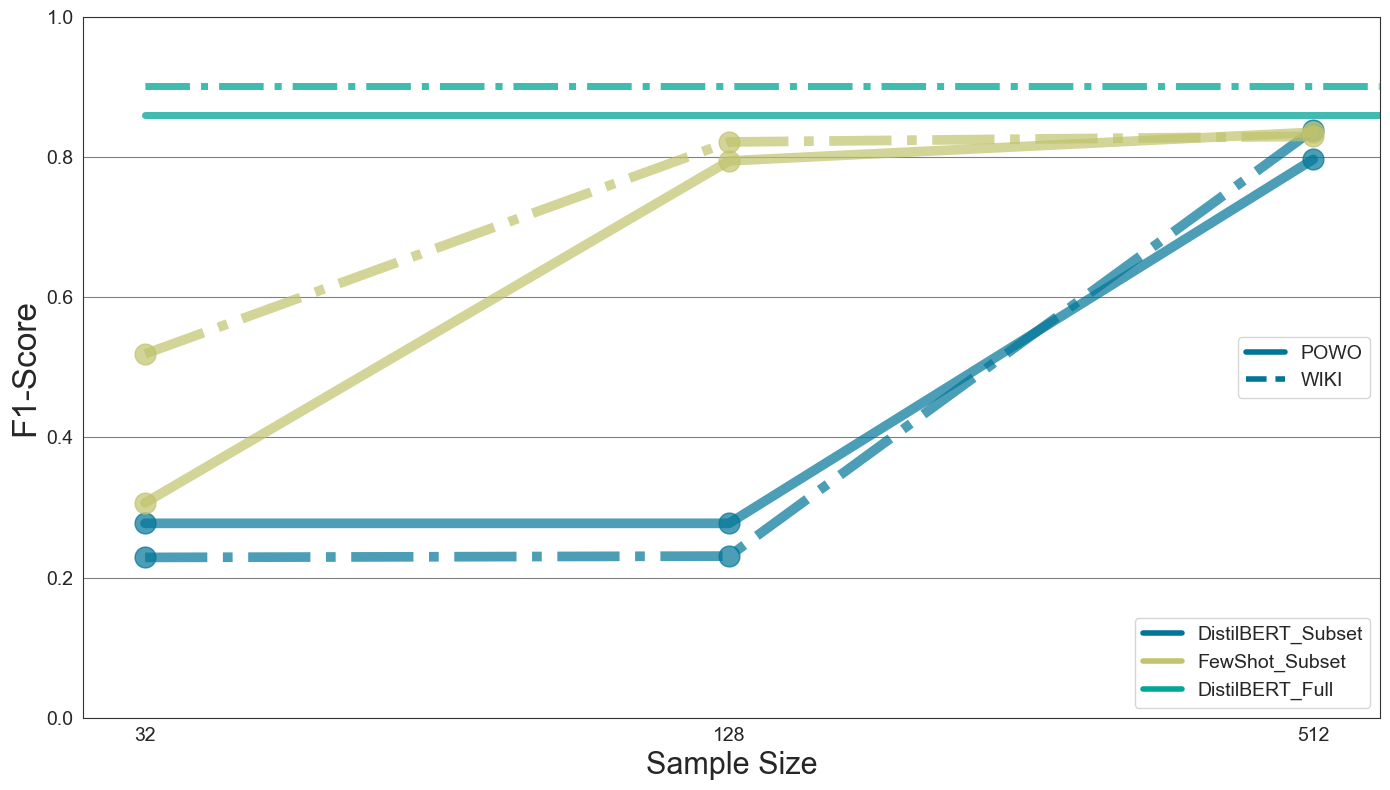

In [27]:
for i, metric in enumerate(["F1-Score"]):

    fig, axes  = plt.subplots(figsize=(14,8), nrows = 1)

    for j, model in enumerate(["DistilBERT", "SetFit"]):    
        for k, dataset in enumerate(["POWO", "WIKI"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Dataset"]==dataset)]
            linestyle = "-" if dataset=="POWO" else "-."
            plt.plot(df_subset["Sample Size"], df_subset[metric], marker = "o", markersize = 15, linewidth = 7, linestyle = linestyle, color = color_palette[j+2], alpha = 0.7)
            plt.plot(np.arange(32, 600), np.repeat(df_results_max[(df_results_max["Dataset"]==dataset)][metric], 568), linewidth = 5, linestyle = linestyle, color = color_palette[4], alpha = 0.5)
    plt.xscale("log")

    axes.set_xticks([32, 128, 512])
    axes.set_xticklabels([32, 128, 512], size=14, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=14)
    axes.grid(axis='x')
    plt.xlabel("Sample Size", size = 22)
    plt.ylabel(metric, size = 24)
    plt.xlim(0, 600)
    plt.ylim(0, 1)
    if(i==0):
        # plt.legend()
        traits = [mlines.Line2D([], [], color=color_palette[i+2], marker='', ls='-', linewidth = 4, label=focus_name) for i, focus_name in enumerate(["DistilBERT_Subset", "FewShot_Subset", "DistilBERT_Full"])]
        # plt.legend(handles=traits, fontsize = 14, loc = "upper right")

        datasets = [mlines.Line2D([], [], color=color_palette[2], marker='', ls='-', markersize = 10, linewidth = 4, label="POWO"), mlines.Line2D([], [], color=color_palette[2], marker='', ls='--', markersize = 10, linewidth = 4, label="WIKI")]
        legend1 = plt.legend(handles = datasets, fontsize = 14, loc = "center right")
        plt.legend(handles=traits, fontsize = 14, loc = "lower right")
        plt.gca().add_artist(legend1)

    # plt.xlim(-1.5, 64)
    # plt.legend()
    plt.tight_layout()
    plt.show()